In [53]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
from math import log, e
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

In [3]:
#--------------------------------------#
path = os.getcwd()
files = os.listdir(path)
files

['.git',
 '.ipynb_checkpoints',
 'CS4920',
 'cs4920lab2.ipynb',
 'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-16-02-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-23-02-2018_TrafficForML_CICFlowMeter.csv',
 'New folder',
 'Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv']

In [4]:
files_csv = [f for f in files if f[-3:] == 'csv']
files_csv

['Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-16-02-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-23-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv']

In [8]:
list_csv = []
for f in files_csv:
   df = pd.read_csv(f, index_col=None, header=0)
   list_csv.append(df)
    
frame = pd.concat(list_csv, axis=0, ignore_index=True)

C:\Users\DREADBORN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\DREADBORN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\DREADBORN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\DREADBORN\

In [9]:
frame.replace([np.inf, -np.inf, np.nan, 'NaN','Nan', 'Infinity', -1], 0)

MemoryError: 

In [10]:
frame_label = frame['Label']
frame_label

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
               ...      
8284248    Infilteration
8284249    Infilteration
8284250           Benign
8284251    Infilteration
8284252    Infilteration
Name: Label, Length: 8284253, dtype: object

Text(0.5, 1.0, 'Table of Different Label Counts')

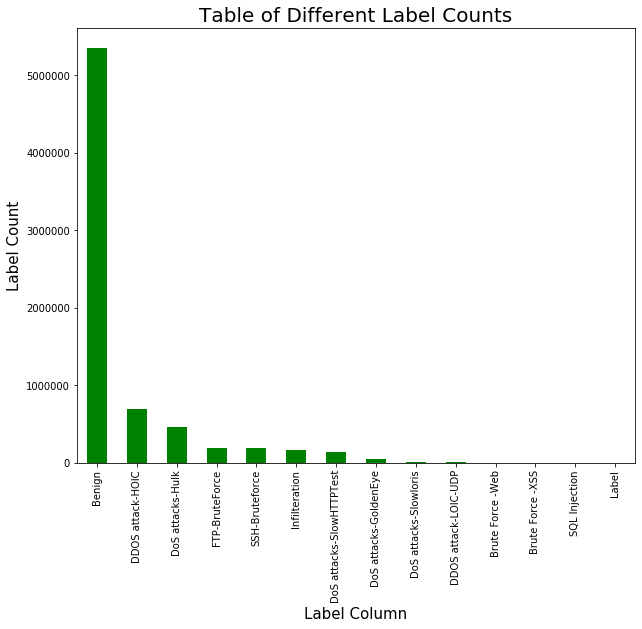

In [15]:
plt.figure(figsize=[10,8])
frame_label.value_counts().plot(kind='bar', color = 'g')
                       
plt.xlabel('Label Column', fontsize = 15)
plt.ylabel('Label Count', fontsize = 15)
plt.title('Table of Different Label Counts', fontsize = 20)

In [3]:
Fri_file = pd.read_csv('Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',index_col=None, header=0)


C:\Users\DREADBORN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Fri_file

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,6,02/03/2018 02:08:18,3982183,14,8,1442,1731.0,725,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048571,3389,6,02/03/2018 02:08:22,3802316,14,8,1440,1731.0,725,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048572,3389,6,02/03/2018 02:08:25,4004239,14,8,1459,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048573,3389,6,02/03/2018 02:08:29,3998435,14,8,1459,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [14]:
Fri_file_label = Fri_file[['Flow Duration', 'Label']]
Fri_file_label

,Flow Duration,Label
0,141385,Benign
1,281,Benign
2,279824,Benign
3,132,Benign
4,274016,Benign
...,...,...
1048570,3982183,Benign
1048571,3802316,Benign
1048572,4004239,Benign
1048573,3998435,Benign


In [28]:
Fri_file_label_benign = Fri_file_label.loc[Fri_file_label['Label'] == 'Benign']
Fri_file_label_botnet = Fri_file_label.loc[Fri_file_label['Label'] == 'Bot']

In [29]:
Fri_file_label_benign = Fri_file_label_benign['Flow Duration']
Fri_file_label_botnet = Fri_file_label_botnet['Flow Duration']
Fri_file_label_botnet
Fri_file_label_benign

0           141385
1              281
2           279824
3              132
4           274016
            ...   
1048570    3982183
1048571    3802316
1048572    4004239
1048573    3998435
1048574    3972651
Name: Flow Duration, Length: 762384, dtype: int64

Text(0.5, 1.0, 'Distribution of flow durations for benign versus botnet traffic')

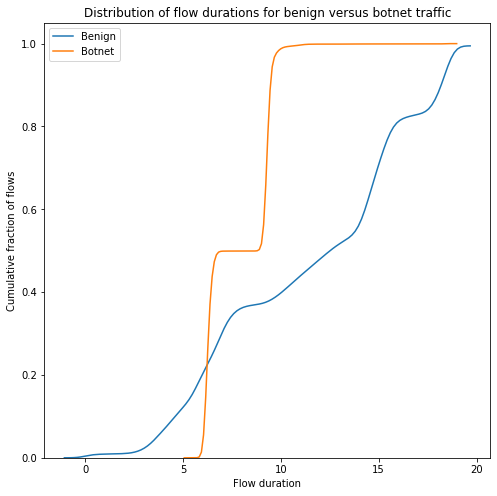

In [41]:
f, ax =plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(np.log(Fri_file_label_benign), label = "Benign", cumulative=True)
ax = sns.kdeplot(np.log(Fri_file_label_botnet), label = "Botnet", cumulative=True)
ax.legend()
plt.xlabel('Flow duration')
plt.ylabel('Cumulative fraction of flows')
plt.title('Distribution of flow durations for benign versus botnet traffic')

In [43]:
Wed_file = pd.read_csv('Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv',index_col=None, header=0)

In [44]:
Wed_file

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [56]:
Wed_file_label = Wed_file[['Flow Duration', 'Label']]
Wed_file_label

,Flow Duration,Label
0,112641719,Benign
1,112641466,Benign
2,112638623,Benign
3,6453966,Benign
4,8804066,Benign
...,...,...
1048570,10156986,Benign
1048571,117,Benign
1048572,5095331,Benign
1048573,5235511,Benign


In [59]:
Wed_file_label_SSH_Bruteforce = Wed_file_label.loc[Wed_file_label['Label'] == 'SSH-Bruteforce']
Wed_file_label_benign = Wed_file_label.loc[Wed_file_label['Label'] == 'Benign']
Wed_file_label_SSH_Bruteforce = Wed_file_label_SSH_Bruteforce['Flow Duration']
Wed_file_label_benign = Wed_file_label_benign['Flow Duration']
Wed_file_label_benign

0          112641719
1          112641466
2          112638623
3            6453966
4            8804066
             ...    
1048570     10156986
1048571          117
1048572      5095331
1048573      5235511
1048574      5807256
Name: Flow Duration, Length: 667626, dtype: int64

In [64]:
def pandas_entropy(column, base=None):
  vc = pd.Series(column).value_counts(normalize=True, sort=False)
  base = e if base is None else base
  return -(vc * np.log(vc)/np.log(base)).sum()

print('Entorpy of flow duration for Benign flows:', pandas_entropy(Wed_file_label_benign))
print('Entorpy of flow duration for SSH-Bruteforce flows:', pandas_entropy(Wed_file_label_SSH_Bruteforce))

Entorpy of flow duration for Benign flows: 10.886516188170019
Entorpy of flow duration for SSH-Bruteforce flows: 6.8328973280615175
